In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from top_down_merge_sort import merge_sort as top_down_merge_sort
from bottom_up_merge_sort import merge_sort as bottom_up_merge_sort
from optimized_merge_sort import merge_sort as optimized_merge_sort
from ten_way_merge_sort import merge_sort as ten_way_merge_sort

from data_preparation import (
    generate_sorted_data,
    generate_random_data,
    generate_almost_sorted_data,
    generate_reversed_data,
    generate_few_unique_data
)

from performance_metrics import measure_performance


In [3]:
data_sizes = [1000, 5000, 10000, 50000, 100000]


In [4]:
algorithms = {
    'Top-Down Merge Sort': top_down_merge_sort,
    'Bottom-Up Merge Sort': bottom_up_merge_sort,
    'Optimized Merge Sort': optimized_merge_sort,
    'Ten-Way Merge Sort': ten_way_merge_sort
}

In [5]:
results = []

for size in data_sizes:
    print(f"Розмір даних: {size}")
    data_types = {
        'Sorted': generate_sorted_data(size),
        'Random': generate_random_data(size),
        'Almost Sorted': generate_almost_sorted_data(size),
        'Reversed': generate_reversed_data(size),
        'Few Unique': generate_few_unique_data(size)
    }

    for data_type, data in data_types.items():
        for alg_name, alg_func in algorithms.items():
            print(f"Алгоритм: {alg_name}, Тип даних: {data_type}")
            metrics, _ = measure_performance(alg_func, data)
            results.append({
                'Algorithm': alg_name,
                'Data Type': data_type,
                'Data Size': size,
                **metrics
            })
            print(f"  Час виконання: {metrics['execution_time']:.6f} секунд")
            print(f"  Кількість порівнянь: {metrics['comparisons']}")
            print(f"  Кількість копіювань: {metrics['copies']}")
            print(f"  Використана пам'ять: {metrics['memory_used']:.6f} MB")

Розмір даних: 1000
Алгоритм: Top-Down Merge Sort, Тип даних: Sorted
  Час виконання: 0.016055 секунд
  Кількість порівнянь: 4932
  Кількість копіювань: 9976
  Використана пам'ять: 0.018408 MB
Алгоритм: Bottom-Up Merge Sort, Тип даних: Sorted
  Час виконання: 0.028514 секунд
  Кількість порівнянь: 5052
  Кількість копіювань: 10000
  Використана пам'ять: 0.156498 MB
Алгоритм: Optimized Merge Sort, Тип даних: Sorted
  Час виконання: 0.012090 секунд
  Кількість порівнянь: 0
  Кількість копіювань: 4278
  Використана пам'ять: 0.009015 MB
Алгоритм: Ten-Way Merge Sort, Тип даних: Sorted
  Час виконання: 0.011312 секунд
  Кількість порівнянь: 2100
  Кількість копіювань: 4000
  Використана пам'ять: 0.008428 MB
Алгоритм: Top-Down Merge Sort, Тип даних: Random
  Час виконання: 0.017531 секунд
  Кількість порівнянь: 8704
  Кількість копіювань: 9976
  Використана пам'ять: 0.017368 MB
Алгоритм: Bottom-Up Merge Sort, Тип даних: Random
  Час виконання: 0.028396 секунд
  Кількість порівнянь: 8740
  Кіль

In [6]:
df_results = pd.DataFrame(results)

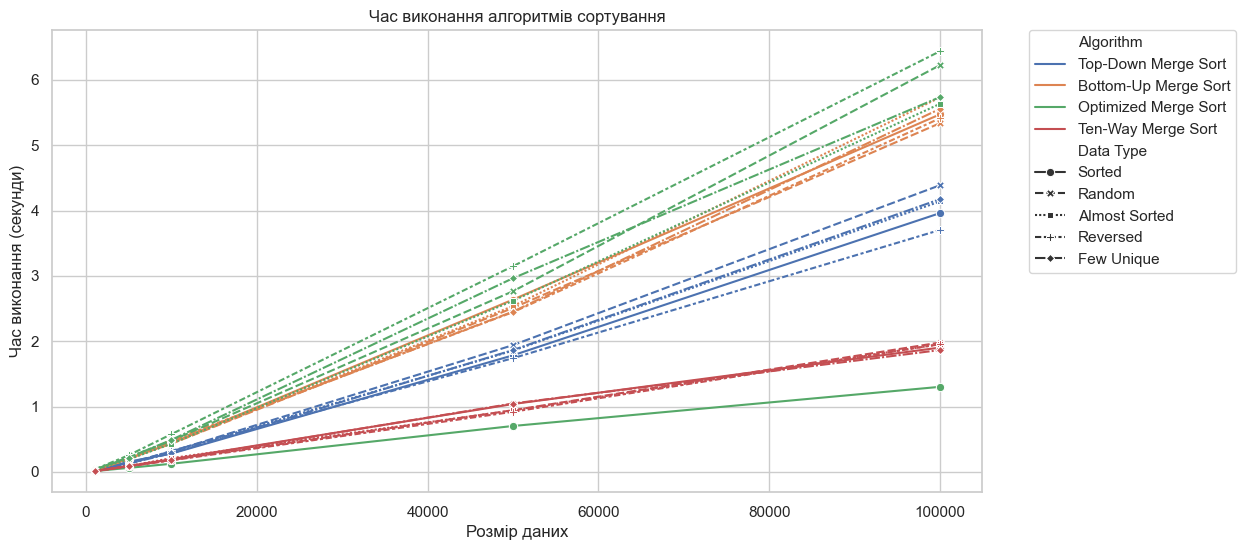

In [7]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_results, x='Data Size', y='execution_time', hue='Algorithm', style='Data Type', markers=True)
plt.title('Час виконання алгоритмів сортування')
plt.xlabel('Розмір даних')
plt.ylabel('Час виконання (секунди)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()